In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import math

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Indian_IPO_Market_Data.csv')
print('Shape of dataset',df.shape)
df.head()

Shape of dataset (319, 9)


,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20


In [3]:
for col in df.columns:
    print(col)

Date 
IPOName
Issue_Size
Subscription_QIB
Subscription_HNI
Subscription_RII
Subscription_Total
Issue_Price
Listing_Gains_Percent


In [4]:
df.describe(include='all')

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
count,319,319,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
unique,287,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,16/08/21,Infinite Comp,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,4.742696
std,NaN,NaN,2384.643786,40.716782,142.454416,14.508670,48.772203,353.897614,47.650946
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.150000
25%,NaN,NaN,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000
50%,NaN,NaN,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000
75%,NaN,NaN,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000


In [5]:
#summary statistics for Listing_Gains_Percent :
df['Listing_Gains_Percent'].describe()

count    319.000000
mean       4.742696
std       47.650946
min      -97.150000
25%      -11.555000
50%        1.810000
75%       25.310000
max      270.400000
Name: Listing_Gains_Percent, dtype: float64

##### Data Exploration

In [6]:
df.isnull().sum()

Date                     0
IPOName                  0
Issue_Size               0
Subscription_QIB         0
Subscription_HNI         0
Subscription_RII         0
Subscription_Total       0
Issue_Price              0
Listing_Gains_Percent    0
dtype: int64

We see no missing values

##### Since we will be building a deep learning classification model and the Listing_Gains_Percent target variable is continous. Therfore, we will need to convert it into a categorical variable before we can proceed.


In [7]:
# Creating a categorical target variable, Listing_Gains_Profit, which takes the binary values 1 when Listing_Gains_Percent is positive and 0 otherwise.
df['Listing_Gains_Profit']=np.where(df['Listing_Gains_Percent']>0,1,0)
df['Listing_Gains_Profit'].describe()

count    319.000000
mean       0.545455
std        0.498712
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Listing_Gains_Profit, dtype: float64

In [8]:
df['Listing_Gains_Profit'].value_counts(normalize=True)

Listing_Gains_Profit
1    0.545455
0    0.454545
Name: proportion, dtype: float64

Hence we see that approx 55% of the IPOs listed in profit, and also we can infer that the data is fairly balanced

In [9]:
# dropping th ecolumns that will not be used for modelling as they might not carry predictive power
df = df.drop(['Date ', 'IPOName', 'Listing_Gains_Percent'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Issue_Size            319 non-null    float64
 1   Subscription_QIB      319 non-null    float64
 2   Subscription_HNI      319 non-null    float64
 3   Subscription_RII      319 non-null    float64
 4   Subscription_Total    319 non-null    float64
 5   Issue_Price           319 non-null    int64  
 6   Listing_Gains_Profit  319 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 17.6 KB


### Data Visualization

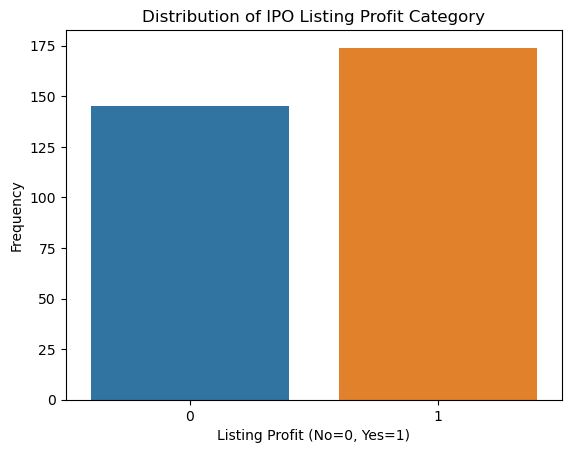

In [18]:
# visualizing the target variable
sns.countplot(x='Listing_Gains_Profit', data=df, hue='Listing_Gains_Profit', legend=False)
plt.title('Distribution of IPO Listing Profit Category')
plt.xlabel('Listing Profit (No=0, Yes=1)')
plt.ylabel('Frequency')
plt.show()

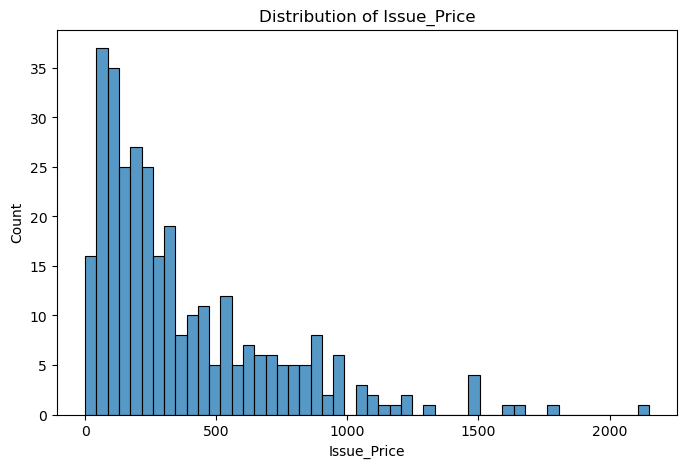

In [11]:
plt.figure(figsize=[8,5])
sns.histplot(data=df, x='Issue_Price', bins=50).set(title='Distribution of Issue_Price', ylabel='Count')
plt.show()

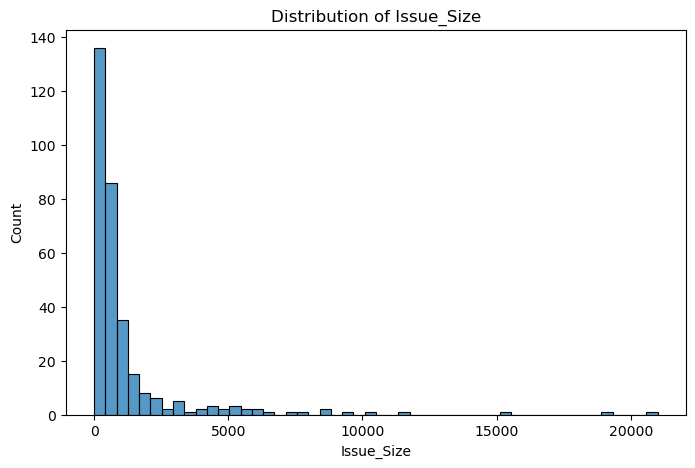

In [12]:
plt.figure(figsize=[8,5])
sns.histplot(data=df, x='Issue_Size', bins=50).set(title='Distribution of Issue_Size', ylabel='Count')
plt.show()

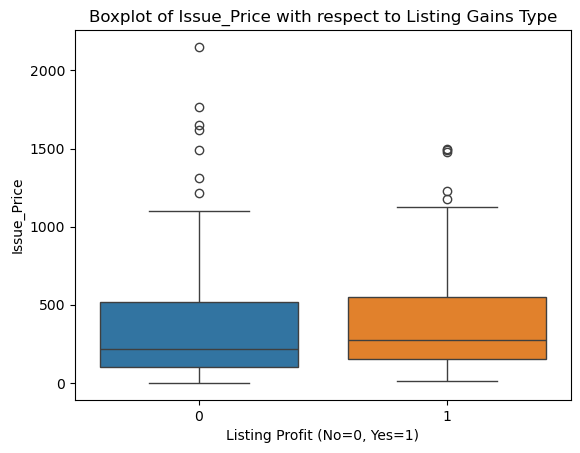

In [17]:
sns.boxplot(data=df, x='Listing_Gains_Profit', y='Issue_Price', hue='Listing_Gains_Profit', legend=False)
plt.title('Boxplot of Issue_Price with respect to Listing Gains Type')
plt.xlabel('Listing Profit (No=0, Yes=1)')

plt.show()

In [19]:
df.skew()

Issue_Size              4.853402
Subscription_QIB        2.143705
Subscription_HNI        3.078445
Subscription_RII        3.708274
Subscription_Total      2.911907
Issue_Price             1.696881
Listing_Gains_Profit   -0.183438
dtype: float64

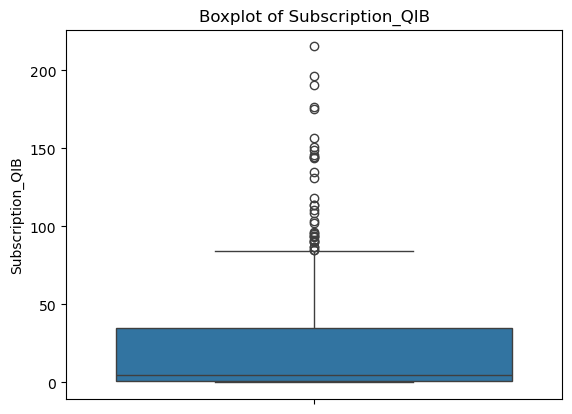

In [20]:
sns.boxplot(data=df, y='Subscription_QIB')
plt.title('Boxplot of Subscription_QIB')
plt.show()

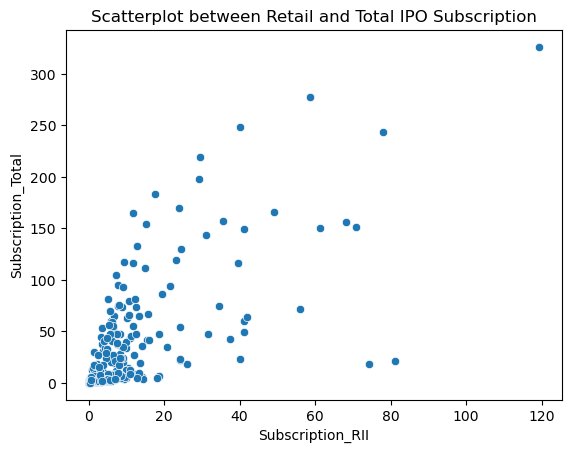

In [21]:
sns.scatterplot(data=df, x='Subscription_RII', y='Subscription_Total')
plt.title('Scatterplot between Retail and Total IPO Subscription')
plt.show()

Some observatioons that can be drawn from above visualizations:

* The histogram and the boxplots show that outliers are present in the data and might need outlier treatment.

* The boxplot of Issue_Price, with respect to Listing_Gains_Profit, shows that there are more outliers for IPOs that listed a loss than there are outliers for IPOs that listed a profit.

* We also observed a correlation between Retail and Total IPO Subscription via a scatterplot.

### Treating Outliers

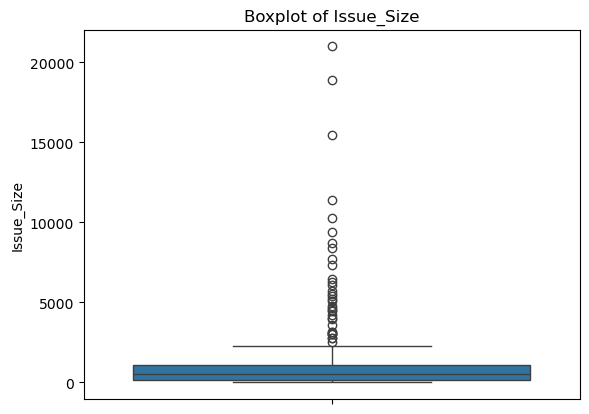

In [22]:
sns.boxplot(data=df, y='Issue_Size')
plt.title('Boxplot of Issue_Size')
plt.show()

In [23]:
q1 = df['Issue_Size'].quantile(q=0.25)
q3 = df['Issue_Size'].quantile(q=0.75)  
iqr = q3 - q1   
lower = (q1 - 1.5 * iqr) 
upper = (q3 + 1.5 * iqr) 
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 930.995
lower = -1227.4875000000002
upper = 2496.4925000000003


In [24]:
df['Issue_Size'] = df['Issue_Size'].clip(lower, upper)
df['Issue_Size'].describe()

count     319.000000
mean      763.561238
std       769.689122
min         0.000000
25%       169.005000
50%       496.250000
75%      1100.000000
max      2496.492500
Name: Issue_Size, dtype: float64

In [25]:
q1 = df['Subscription_QIB'].quantile(q=0.25)
q3 = df['Subscription_QIB'].quantile(q=0.75)  
iqr = q3 - q1   
lower = (q1 - 1.5 * iqr) 
upper = (q3 + 1.5 * iqr) 
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 33.48500000000001
lower = -49.07750000000001
upper = 84.86250000000001


In [26]:
df['Subscription_QIB'] = df['Subscription_QIB'].clip(lower, upper)
df['Subscription_QIB'].describe()

count    319.000000
mean      21.521183
std       29.104549
min        0.000000
25%        1.150000
50%        4.940000
75%       34.635000
max       84.862500
Name: Subscription_QIB, dtype: float64

In [27]:
q1 = df['Subscription_HNI'].quantile(q=0.25)
q3 = df['Subscription_HNI'].quantile(q=0.75)  
iqr = q3 - q1   
lower = (q1 - 1.5 * iqr) 
upper = (q3 + 1.5 * iqr) 
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 60.839999999999996
lower = -90.005
upper = 153.355


In [28]:
df['Subscription_HNI'] = df['Subscription_HNI'].clip(lower, upper)
df['Subscription_HNI'].describe()

count    319.000000
mean      40.356426
std       57.427921
min        0.000000
25%        1.255000
50%        5.070000
75%       62.095000
max      153.355000
Name: Subscription_HNI, dtype: float64

In [29]:
q1 = df['Subscription_RII'].quantile(q=0.25)
q3 = df['Subscription_RII'].quantile(q=0.75)  
iqr = q3 - q1   
lower = (q1 - 1.5 * iqr) 
upper = (q3 + 1.5 * iqr) 
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 7.33
lower = -9.72
upper = 19.6


In [30]:
df['Subscription_RII'] = df['Subscription_RII'].clip(lower, upper)
df['Subscription_RII'].describe()

count    319.000000
mean       6.060940
std        6.176882
min        0.000000
25%        1.275000
50%        3.420000
75%        8.605000
max       19.600000
Name: Subscription_RII, dtype: float64

In [31]:
q1 = df['Subscription_Total'].quantile(q=0.25)
q3 = df['Subscription_Total'].quantile(q=0.75)  
iqr = q3 - q1   
lower = (q1 - 1.5 * iqr) 
upper = (q3 + 1.5 * iqr) 
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 31.749999999999996
lower = -45.97999999999999
upper = 81.01999999999998


In [32]:
df['Subscription_Total'] = df['Subscription_Total'].clip(lower, upper)
df['Subscription_Total'].describe()

count    319.000000
mean      20.456646
std       27.217740
min        0.000000
25%        1.645000
50%        4.930000
75%       33.395000
max       81.020000
Name: Subscription_Total, dtype: float64

There are different approaches to outlier treatment, but the one we've used here is outlier identification using the interquartile menthod. Once we identified the outliers, we clipped the variable values between the upper and lower bounds.